In [1]:
import pandas as pd
import math
import numpy as np
from scipy.io import arff
import heapq
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.cluster import  DBSCAN
import seaborn as sns

In [2]:
data = arff.loadarff('segment.arff')
df = pd.DataFrame(data[0])
# getting the dataframe from weka!!
df.shape

(2310, 20)

In [3]:
#getting the features from the dataframe
features = df.columns.drop(df.columns[-1])
#Normalization the X
df1 = df[features]
zdf = (df1 - df1.mean())/df1.std()
zdf.head()
zdf = zdf.fillna(0)
a = [775, 1020, 200, 127, 329]
b = [1626, 1515, 651, 658, 328]
c = [775, 1020, 200, 127, 329, 1626, 1515, 651, 658, 328, 1160, 108, 422, 88, 105, 261, 212,
1941, 1724, 704, 1469, 635, 867, 1187, 445, 222, 1283, 1288, 1766, 1168, 566, 1812, 214,
53, 423, 50, 705, 1284, 1356, 996, 1084, 1956, 254, 711, 1997, 1378, 827, 1875, 424,
1790, 633, 208, 1670, 1517, 1902, 1476, 1716, 1709, 264, 1, 371, 758, 332, 542, 672, 483,
65, 92, 400, 1079, 1281, 145, 1410, 664, 155, 166, 1900, 1134, 1462, 954, 1818, 1679,
832, 1627, 1760, 1330, 913, 234, 1635, 1078, 640, 833, 392, 1425, 610, 1353, 1772, 908,
1964, 1260, 784, 520, 1363, 544, 426, 1146, 987, 612, 1685, 1121, 1740, 287, 1383, 1923,
1665, 19, 1239, 251, 309, 245, 384, 1306, 786, 1814, 7, 1203, 1068, 1493, 859, 233, 1846,
1119, 469, 1869, 609, 385, 1182, 1949, 1622, 719, 643, 1692, 1389, 120, 1034, 805, 266,
339, 826, 530, 1173, 802, 1495, 504, 1241, 427, 1555, 1597, 692, 178, 774, 1623, 1641,
661, 1242, 1757, 553, 1377, 1419, 306, 1838, 211, 356, 541, 1455, 741, 583, 1464, 209,
1615, 475, 1903, 555, 1046, 379, 1938, 417, 1747, 342, 1148, 1697, 1785, 298, 1485,
945, 1097, 207, 857, 1758, 1390, 172, 587, 455, 1690, 1277, 345, 1166, 1367, 1858, 1427,
1434, 953, 1992, 1140, 137, 64, 1448, 991, 1312, 1628, 167, 1042, 1887, 1825, 249, 240,
524, 1098, 311, 337, 220, 1913, 727, 1659, 1321, 130, 1904, 561, 1270, 1250, 613, 152,
1440, 473, 1834, 1387, 1656, 1028, 1106, 829, 1591, 1699, 1674, 947, 77, 468, 997, 611,
1776, 123, 979, 1471, 1300, 1007, 1443, 164, 1881, 1935, 280, 442, 1588, 1033, 79, 1686,
854, 257, 1460, 1380, 495, 1701, 1611, 804, 1609, 975, 1181, 582, 816, 1770, 663, 737,
1810, 523, 1243, 944, 1959, 78, 675, 135, 1381, 1472]
idice = a+b+c
X = zdf.values

In [4]:
zdf.count()

region-centroid-col     2310
region-centroid-row     2310
region-pixel-count      2310
short-line-density-5    2310
short-line-density-2    2310
vedge-mean              2310
vegde-sd                2310
hedge-mean              2310
hedge-sd                2310
intensity-mean          2310
rawred-mean             2310
rawblue-mean            2310
rawgreen-mean           2310
exred-mean              2310
exblue-mean             2310
exgreen-mean            2310
value-mean              2310
saturation-mean         2310
hue-mean                2310
dtype: int64

In [5]:
#getting the distance matrix for every test data
def get_distance(X_train,random_points):
    matrix_distance = []
    for i in range(X_train.shape[0]):
        list_distance = []
        for j in random_points:
            d = (np.sum((X_train[i] - j)**2))**0.5
            list_distance.append(d)
        matrix_distance.append(list_distance)
    return matrix_distance

# 1 the matrix,2 k ,3 , train_targets
def get_group(matrix_distance):
    outcome = []
    for j in range(len(matrix_distance)) :
        index_dice = matrix_distance[j].index(min(matrix_distance[j]))
        outcome.append(index_dice)
    return outcome

def get_set(tags):
    d = defaultdict(list)
    n = 0
    for i in tags:
        d[i].append(n)
        n = n + 1
    return d

#np.linalg.norm([all_features[j] - final_centroids[i]], axis = 1)
def get_SSE(group_point):
    s = 0
    for i in group_point:
        a=np.sum((X[group_point[i]]-initial[i])**2)
        s+= a
    return s

def get_newcentroids(X_train_dataframe,group_point):
    da = []
    for l in sorted(group_point.keys()):
        a = X_train_dataframe.iloc[group_point[l],:].mean()
        a = np.array(a)
        da.append(a)
    return np.array(da)

In [6]:
k_list = list(range(1,13)) #setting the k from 1 to 12
every_k_mean = []
every_k_std = []
for k in k_list:    
    idice_list = idice.copy()
    idice_list = idice_list[:(25*k)] # getting the start points only could run 25 times 
    #print(len(idice_list))
    best_cluster = [] #for each condition, we get the final/lowest SSE
    while len(idice_list) != 0: # picking the points to iterate
        a = [] 
        for z in range(k):
            v = idice_list.pop(0)
            a.append(v)
        #getting the initial seed for the iteration
        #print(len(idice_list))
        #print(a)
        initial = [] # 
        for initial_centroid in a:
            initial.append(X[initial_centroid])#
        initial = np.array(initial)
        #print(initial)
        #print('initial completion !!!!')

        outcome_group = []
        outcome_score = []
        for round_try in range(50): #interation is a 50 instance
            seed = initial.copy()
            #print(seed)
            dis = get_distance(X,seed)
            run = get_group(dis)
            #print(run)
            group_points = get_set(run)
            
            #print(group_points)
            score = get_SSE(group_points)
            #print(score)
            next_seed = get_newcentroids(zdf,group_points)
            #print(seed)
            #print(next_seed)
            if np.array_equal(seed,next_seed)== False:
                initial = next_seed.copy()
                outcome_group.append(group_points)
                outcome_score.append(score)
            else:
                outcome_group.append(group_points)
                outcome_score.append(score)
                break
        #print(len(outcome_score))    
        best = min(outcome_score)# get the lowest SSE, with The final centroid for specific start points.
        best_cluster.append(best)# getting different answer which starts in others points
    mean_SSE = np.mean(best_cluster) #getting the mean
    std_SSE = np.std(best_cluster)#and std between
    print('when k is ',k,'the mean SSE is',mean_SSE)
    every_k_mean.append(mean_SSE)
    print('when k is ',k,'the std SSE is',std_SSE)
    every_k_std.append(std_SSE)
print('finish')    


when k is  1 the mean SSE is 41561.999999999796
when k is  1 the std SSE is 0.0
when k is  2 the mean SSE is 29205.01514493819
when k is  2 the std SSE is 2069.950410384147
when k is  3 the mean SSE is 24294.04011990821
when k is  3 the std SSE is 735.71320996403
when k is  4 the mean SSE is 20940.478334742722
when k is  4 the std SSE is 1433.199412051737
when k is  5 the mean SSE is 18355.978502437658
when k is  5 the std SSE is 1691.0793824295781
when k is  6 the mean SSE is 15795.154469246092
when k is  6 the std SSE is 1419.0679404371024
when k is  7 the mean SSE is 14310.496096792898
when k is  7 the std SSE is 1452.1767758271076
when k is  8 the mean SSE is 13278.199998291544
when k is  8 the std SSE is 1134.4335531978845
when k is  9 the mean SSE is 12318.775097215372
when k is  9 the std SSE is 763.2934558878273
when k is  10 the mean SSE is 11545.51314464484
when k is  10 the std SSE is 639.6927957672033
when k is  11 the mean SSE is 10926.414486305877
when k is  11 the std SS

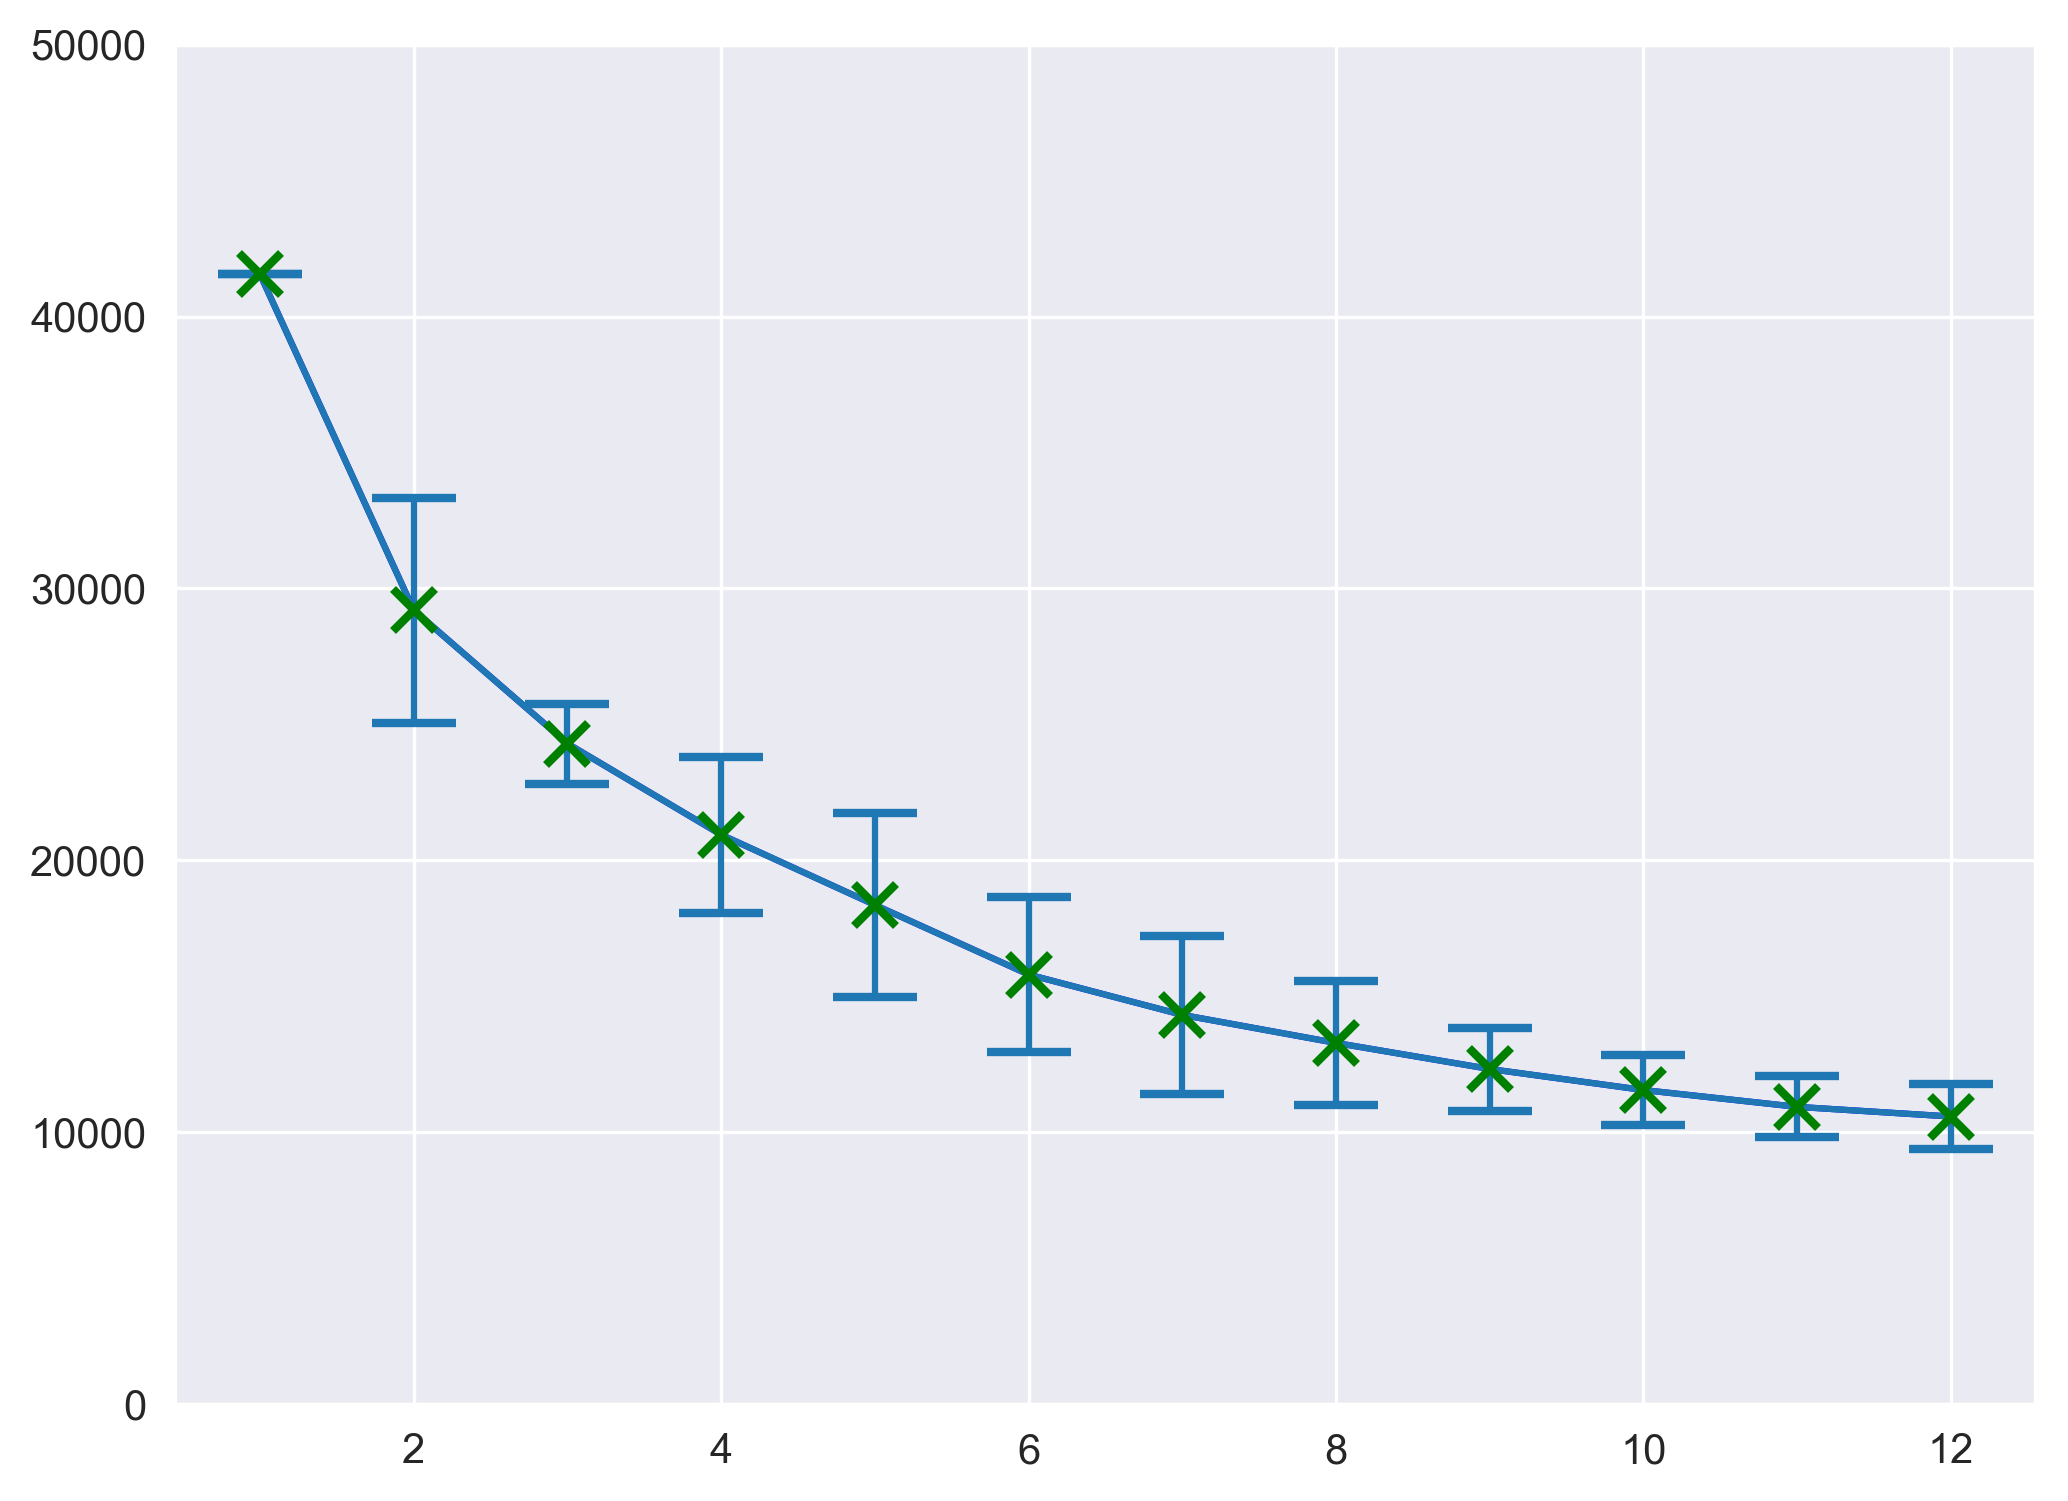

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6),dpi=300)
plt.plot(k_list,every_k_mean,c = 'b')
plt.ylim(0,50000)
plt.errorbar(k_list,every_k_mean,yerr= 2*np.array(every_k_std),capsize=10,marker='x', mfc='red',
         mec='green', ms=10, mew=2)
plt.show()

In [8]:
k_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [9]:
column_names = ['k', 'µk', 'µk − 2σk','µk + 2σk']
low = np.array(every_k_mean) - np.array(every_k_std)*2
low = list(low)
high = np.array(every_k_mean) + np.array(every_k_std)*2
high = list(high)
answer = {'k':k_list,
          'µk':every_k_mean,
          'µk − 2σk':low,
          'µk + 2σk':high}
answer_df = pd.DataFrame(answer)
answer_df

,k,µk,µk − 2σk,µk + 2σk
0,1,41562.000000,41562.000000,41562.000000
1,2,29205.015145,25065.114324,33344.915966
2,3,24294.040120,22822.613700,25765.466540
3,4,20940.478335,18074.079511,23806.877159
4,5,18355.978502,14973.819738,21738.137267
5,6,15795.154469,12957.018588,18633.290350
6,7,14310.496097,11406.142545,17214.849648
7,8,13278.199998,11009.332892,15547.067105
8,9,12318.775097,10792.188185,13845.362009
9,10,11545.513145,10266.127553,12824.898736


In [11]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=1, random_state=2).fit(X)

In [12]:
kmeans.cluster_centers_

array([[-1.47068505e-17,  1.23926843e-16,  0.00000000e+00,
        -6.98911828e-16, -1.02130906e-17,  3.23742956e-16,
        -9.61232056e-18,  7.28710022e-16, -3.44553630e-16,
         9.68729666e-16, -6.96412625e-16,  5.85678692e-16,
        -3.24319696e-16,  1.72185498e-15, -1.24460327e-15,
         7.82707232e-16, -4.66197547e-17, -3.73890433e-15,
         7.03273418e-16]])

In [13]:
np.sum((X - kmeans.cluster_centers_)**2)

41561.9999999998

In [14]:
list_tocluster =[0, 4, 5, 20, 25, 39, 43, 44]
frame = []
for first in list_tocluster:
    row = []
    for second in list_tocluster:
        dis = abs(first - second)
        row.append(dis)
    frame.append(row)

In [15]:
dataframe = pd.DataFrame(data = frame,columns= list_tocluster,index=list_tocluster)
dataframe

,0,4,5,20,25,39,43,44
0,0,4,5,20,25,39,43,44
4,4,0,1,16,21,35,39,40
5,5,1,0,15,20,34,38,39
20,20,16,15,0,5,19,23,24
25,25,21,20,5,0,14,18,19
39,39,35,34,19,14,0,4,5
43,43,39,38,23,18,4,0,1
44,44,40,39,24,19,5,1,0


In [16]:
C1 = {(1, 1),(2, 2),(3, 3)} 
C2 = {(5, 2),(6, 2),(7, 2),(8, 2),(9, 2)}
#unzipping into array
a1,b1,c1 = [np.array(i) for i in C1]
a2,b2,c2,d2,e2 = [np.array(i) for i in C2]
N1 = len(C1)
N2 = len(C2)

#getting the mean in each sets and whole points
u1 = (a1+b1+c1)/N1
u2 = (a2+b2+c2+d2+e2)/N2
u = (a1+b1+c1+a2+b2+c2+d2+e2)/(N1+N2)
u1,u2,u

u1,u2,u
#Two Clusters
x1 = (a1,b1,c1) - u1
x2 = (a2,b2,c2,d2,e2) -u2

S1 = np.zeros([2,2])
for i in x1:
    S1+=(np.mat(i).T)*np.mat(i)

S2 = np.zeros([2,2])
for i in x2:
    print((np.mat(i).T)*np.mat(i))
    S2+=(np.mat(i).T)*np.mat(i)

#Getting the Sw and its trace    
S1,S2
Sw = S1+S2
np.trace(Sw)


Sb1 = (np.mat(u1 - u).T *np.mat(u1 - u))*N1
Sb2 = (np.mat(u2 - u).T *np.mat(u2 - u))*N2

SB = Sb1+Sb2
SB

np.trace(SB)/np.trace(Sw)

[[1. 0.]
 [0. 0.]]
[[4. 0.]
 [0. 0.]]
[[ 1. -0.]
 [-0.  0.]]
[[ 4. -0.]
 [-0.  0.]]
[[0. 0.]
 [0. 0.]]


3.3482142857142856

In [17]:
u1,u2,u
#Two Clusters
x1 = (a1,b1,c1) - u1
x2 = (a2,b2,c2,d2,e2) -u2

S1 = np.zeros([2,2])
for i in x1:
    S1+=(np.mat(i).T)*np.mat(i)

S2 = np.zeros([2,2])
for i in x2:
    print((np.mat(i).T)*np.mat(i))
    S2+=(np.mat(i).T)*np.mat(i)

#Getting the Sw and its trace    
S1,S2
Sw = S1+S2
np.trace(Sw)


[[1. 0.]
 [0. 0.]]
[[4. 0.]
 [0. 0.]]
[[ 1. -0.]
 [-0.  0.]]
[[ 4. -0.]
 [-0.  0.]]
[[0. 0.]
 [0. 0.]]


14.0

In [18]:
Sb1 = (np.mat(u1 - u).T *np.mat(u1 - u))*N1
Sb2 = (np.mat(u2 - u).T *np.mat(u2 - u))*N2

In [19]:
SB = Sb1+Sb2
SB

matrix([[46.875,  0.   ],
        [ 0.   ,  0.   ]])

In [20]:
np.trace(SB)/np.trace(Sw)

3.3482142857142856

In [21]:
 np.trace(SB)/np.trace(Sw)


3.3482142857142856

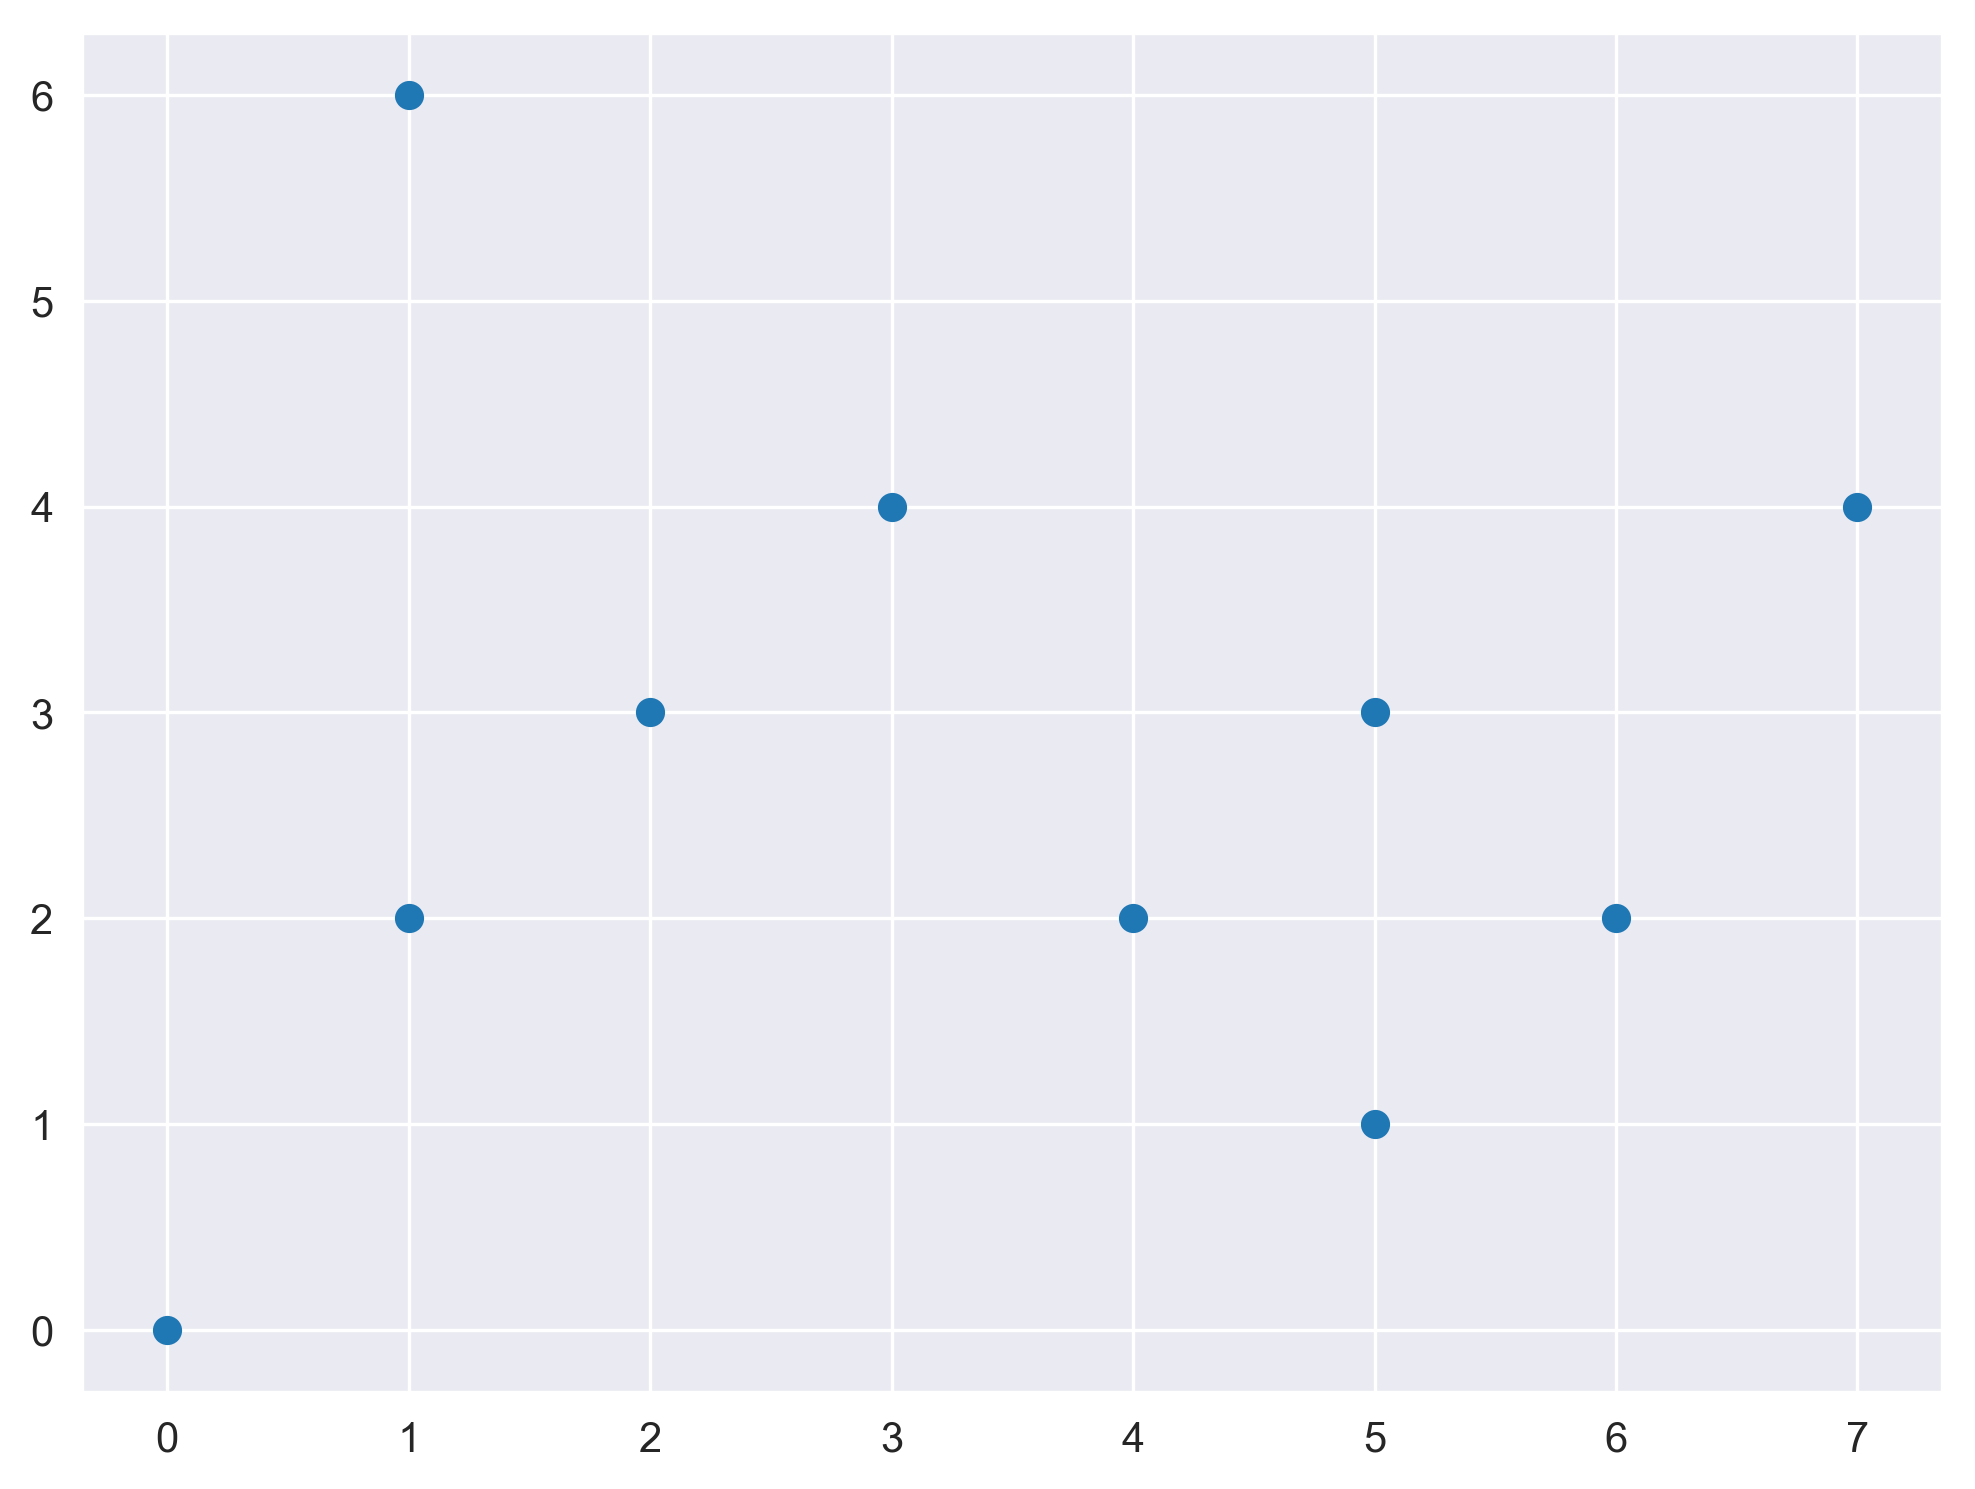

In [22]:
#Q4
q4 = [(0, 0),(1, 2),(1, 6),(2, 3),(3, 4),(5, 1),(4, 2),(5, 3),(6, 2),(7, 4)]
x = [i[0] for i in q4]
y = [i[1] for i in q4]
db_data = pd.DataFrame(q4)
plt.figure(figsize=(8,6),dpi=300)
plt.scatter(x,y,)


In [23]:
db = DBSCAN(eps=2**0.5,min_samples=3).fit(db_data.values)
db_data[db.labels_ == -1]



,0,1
0,0,0
2,1,6
9,7,4


In [24]:
db_data[db.labels_ == 0]

,0,1
1,1,2
3,2,3
4,3,4


In [25]:
db_data[db.labels_ == 1]

,0,1
5,5,1
6,4,2
7,5,3
8,6,2


Q5

In [26]:
Q5 = pd.read_csv('Q5.csv').iloc[:10,:4]

In [27]:
true_p = 4
false_n = 1
false_p = 2
true_n = 3

In [28]:
con = pd.DataFrame(data = [[4,2],[1,3]],columns=['true_positive','true_negative'],index=['pred_positive','pred_negative'])

In [29]:
con

,true_positive,true_negative
pred_positive,4,2
pred_negative,1,3


In [30]:
presician = 4/6
recall = 4/5
F1 = 8/11
SPC = 3/5

print('presician is ',presician)
print('recall is ',recall)
print('F1 score is ',F1)
print('SPC is ',SPC)

presician is  0.6666666666666666
recall is  0.8
F1 score is  0.7272727272727273
SPC is  0.6
